[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [100]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

OSError: '../../style_Matplotlib_charts.mplstyle' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# Create a data frame from the csv file
training_data = pd.read_csv('2.3.2.training_data.csv')

x_name = ['BMI', 'BP', 'TC', 'BGU', 'FDR', 'Age', 'Risk', 'Risk%', 'FHRisk', 'CombRisk']
y_name = 'Target'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

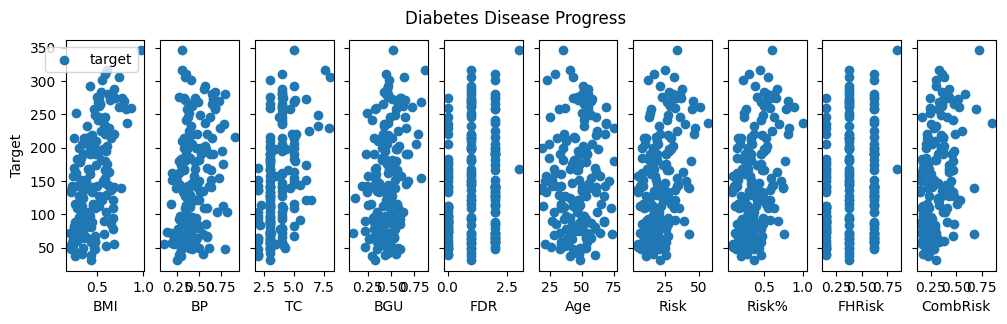

In [ ]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'target')
    ax[i].set_xlabel(x_name[i])
ax[0].set_ylabel("Target"); ax[0].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [ ]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

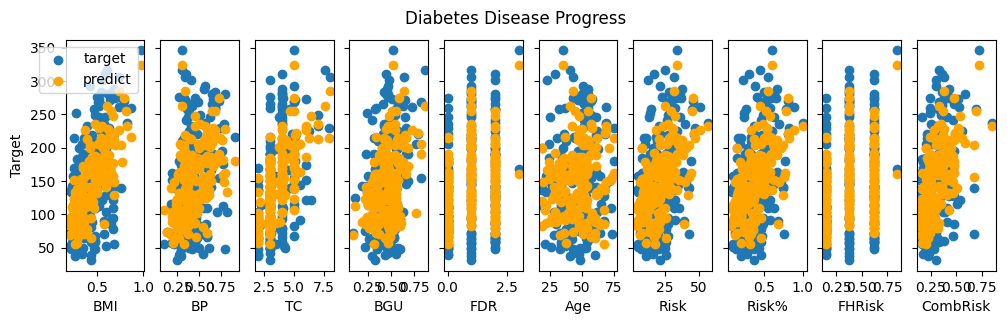

In [ ]:
# scatter plot predictions and targets vs original features    
y_pred = my_model.predict(x)
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'target')
    ax[i].set_xlabel(x_name[i])
    ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Target"); ax[0].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [ ]:
# save the model to disk
import pickle
filename = 'my_saved_model_v9.sav'
pickle.dump(my_model, open('../determing_best_features/' + filename, 'wb'))

#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [ ]:
filename = 'my_saved_model_v9.sav'
model_C = pickle.load(open(filename, 'rb'))

In [ ]:
# Optional
filename = 'my_saved_model_v3.sav'
model_D = pickle.load(open(filename, 'rb'))

In [ ]:
mx_col = ['BMI', 'BP', 'TC', 'BGU', 'FDR', 'Age', 'Risk', 'Risk%', 'FHRisk', 'CombRisk']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

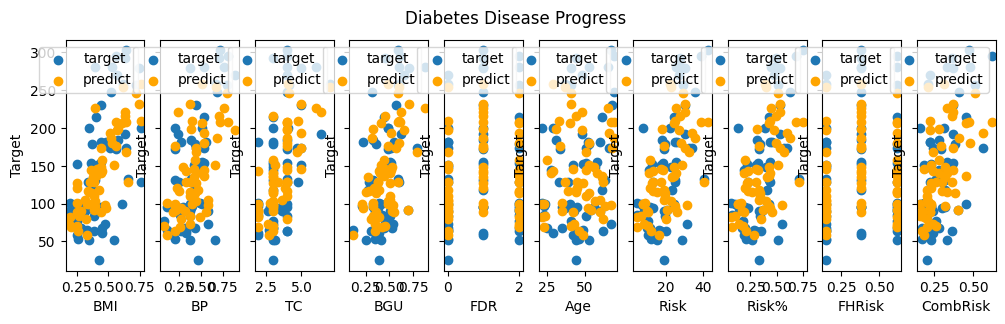

In [ ]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [102]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5088065443957357


In [184]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

ValueError: X has 3 features, but LinearRegression is expecting 4 features as input.

In [ ]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

In [ ]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

#### Step 10

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.